# Photovoltaic power and solar radiation forecasting - Data exploration
Base on the paper at https://sci-hub.st/https:/aip.scitation.org/doi/abs/10.1063/5.0014016

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

## 1. Data exploration

In [2]:
!ls -Alh dataset

total 2481128
-rw-r--r--  1 gerson  staff   493K 26 fév 15:06 datetime_test.npy
-rw-r--r--  1 gerson  staff   4,5M 26 fév 15:06 datetime_trainval.npy
-rw-r--r--  1 gerson  staff   116M 26 fév 15:06 images_test.npy
-rw-r--r--  1 gerson  staff   1,1G 26 fév 15:12 images_trainval.npy
-rw-r--r--  1 gerson  staff    78K 26 fév 15:05 pv_log_test.npy
-rw-r--r--  1 gerson  staff   726K 26 fév 15:05 pv_log_trainval.npy


In [3]:
# datetime data
datetime_trainval= pd.DataFrame(np.load('dataset/datetime_trainval.npy', allow_pickle=True)[()], columns=['d_t'])
datetime_test    = pd.DataFrame(np.load('dataset/datetime_test.npy', allow_pickle=True)[()],columns=['d_t'])

# pv log data
pv_log_trainval  = pd.DataFrame(np.load('dataset/pv_log_trainval.npy', allow_pickle=True)[()],columns=['pv_l'])
pv_log_test      = pd.DataFrame(np.load('dataset/pv_log_test.npy', allow_pickle=True)[()],columns=['pv_l'])

# sky images data
images_trainval  = np.load('dataset/images_trainval.npy', allow_pickle=True)[()]
images_test      = np.load('dataset/images_test.npy', allow_pickle=True)[()]

## 1.1 'datetime' trainval and test

In [4]:
print(f"datetime_trainval.shape: {datetime_trainval.shape}")
print(f"datetime_trainval head : ")
datetime_trainval.head(3)

datetime_trainval.shape: (92975, 1)
datetime_trainval head : 


,d_t
0,2017-03-09 08:00:20
1,2017-03-09 08:01:20
2,2017-03-09 08:02:20


In [5]:
print(f"datetime_test.shape    : {datetime_test.shape}")
print(f"datetime_test head     : ")
datetime_test.head(3)

datetime_test.shape    : (9910, 1)
datetime_test head     : 


,d_t
0,2017-05-20 08:00:00
1,2017-05-20 08:01:00
2,2017-05-20 08:02:00


<div class="alert alert-block alert-success">
    <b>Comment #1:</b>
   We note data collection of one minute interval.
</div>

## 1.2 'pv_log' trainval and test

In [6]:
print(f"pv_log_trainval.shape: {pv_log_trainval.shape}")
print(f"pv_log_trainval head :")
pv_log_trainval.head(3)

pv_log_trainval.shape: (92975, 1)
pv_log_trainval head :


,pv_l
0,6.205507
1,6.301439
2,6.456909


In [7]:
print("Somme statistics on 'pv_log_trainval' data:")
pv_log_trainval.describe()

Somme statistics on 'pv_log_trainval' data:


,pv_l
count,92975.000000
mean,15.205522
std,7.177062
min,0.000397
25%,9.296960
50%,16.670013
75%,21.374017
max,29.559791


In [8]:
print(f"pv_log_test.shape: {pv_log_test.shape}")
print(f"pv_log_test head :")
pv_log_test.head(3)

pv_log_test.shape: (9910, 1)
pv_log_test head :


,pv_l
0,4.135803
1,4.270825
2,4.415733


In [9]:
print("Somme statistics on 'pv_log_test' data:")
pv_log_test.describe()

Somme statistics on 'pv_log_test' data:


,pv_l
count,9910.000000
mean,14.564921
std,7.474454
min,0.001334
25%,7.893500
50%,16.062818
75%,21.004520
max,29.497691


<div class="alert alert-block alert-success">
    <b>Comment #2:</b>
   'pv_log_trainval' and 'pv_log_test' datas have similar statistical distribution.
</div>

## 1.3 'images' trainval and test

images_trainval.shape   : (92975, 64, 64, 3)
images_trainval examples:


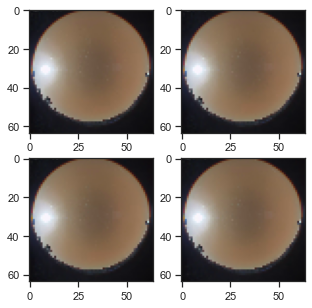

In [10]:
print(f"images_trainval.shape   : {images_trainval.shape}")
print(f"images_trainval examples:")
fig, axes = plt.subplots(2,2, figsize=(5,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(images_trainval[i])

images_test.shape   : (9910, 64, 64, 3)
images_test examples:


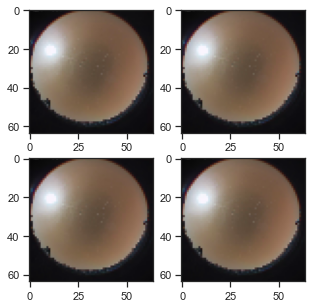

In [11]:
print(f"images_test.shape   : {images_test.shape}")
print(f"images_test examples:")
fig, axes = plt.subplots(2,2, figsize=(5,5))
for i,ax in enumerate(axes.flat):
    ax.imshow(images_test[i])

## 1.4 Some plottings
### 1.4.1 Curve of 48 hours pv outputs history

In [12]:
# Getting look of what is hapenning with pv output in 48 ours history (that is 2880 datapoints)
n_dtpoints = 2880
df_48hrs = pd.concat([datetime_trainval[:n_dtpoints],pv_log_trainval[:n_dtpoints]], axis=1)
df_48hrs.pv_l.describe()

count    2880.000000
mean       18.384312
std         6.563474
min         0.224436
25%        13.826858
50%        20.259372
75%        23.749220
max        28.375113
Name: pv_l, dtype: float64

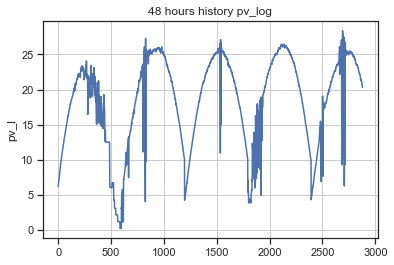

In [13]:
sns.lineplot(data=df_48hrs.pv_l)
plt.title('48 hours history pv_log')
plt.grid()
plt.show()

> ## Extrating year, month, day, hour and minute from datetime data

In [14]:
from datetime import datetime

datetime_trainval = datetime_trainval.assign(
    year=lambda datetime_trainval: datetime_trainval.d_t.map(lambda x: x.year),
    month=lambda datetime_trainval: datetime_trainval.d_t.map(lambda x: x.month),
    day=lambda datetime_trainval: datetime_trainval.d_t.map(lambda x: x.day),
    hour=lambda datetime_trainval: datetime_trainval.d_t.map(lambda x: x.hour),
    minute=lambda datetime_trainval: datetime_trainval.d_t.map(lambda x: x.minute)
)

df_tv_dtpvl = pd.concat([datetime_trainval,pv_log_trainval], axis=1)
df_tv_dtpvl.head()

,d_t,year,month,day,hour,minute,pv_l
0,2017-03-09 08:00:20,2017,3,9,8,0,6.205507
1,2017-03-09 08:01:20,2017,3,9,8,1,6.301439
2,2017-03-09 08:02:20,2017,3,9,8,2,6.456909
3,2017-03-09 08:03:20,2017,3,9,8,3,6.599264
4,2017-03-09 08:04:20,2017,3,9,8,4,6.719098


### 1.4.2. Curve of pv outputs for a sunny day (2017-07-01)

In [15]:
df_2017_07_01 = df_tv_dtpvl[(df_tv_dtpvl.year==2017) & (df_tv_dtpvl.month==7) & (df_tv_dtpvl.day==1)]
df_2017_07_01

,d_t,year,month,day,hour,minute,pv_l
22401,2017-07-01 08:00:00,2017,7,1,8,0,4.716106
22402,2017-07-01 08:01:00,2017,7,1,8,1,4.810850
22403,2017-07-01 08:02:00,2017,7,1,8,2,5.033151
22404,2017-07-01 08:03:00,2017,7,1,8,3,5.138233
22405,2017-07-01 08:04:00,2017,7,1,8,4,5.315331
...,...,...,...,...,...,...,...
22996,2017-07-01 17:55:00,2017,7,1,17,55,11.463515
22997,2017-07-01 17:56:00,2017,7,1,17,56,11.352941
22998,2017-07-01 17:57:00,2017,7,1,17,57,11.257319
22999,2017-07-01 17:58:00,2017,7,1,17,58,11.155566


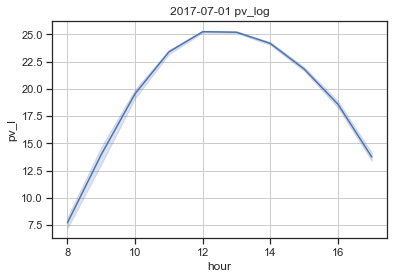

In [16]:
sns.lineplot(data=df_2017_07_01, x="hour", y="pv_l")
plt.title('2017-07-01 pv_log')
plt.grid()
plt.show()

<div class="alert alert-block alert-success">
    <b>Comment #3:</b>
    the plot of pv outputs versus time for the sample sunny day of 2017-07-01, taken from 08:00 to 17:59 shows O(n^2) complexity relationship.
</div>

### 1.4.3 Curve of pv outputs for a cloudy day (2018-01-16)

In [17]:
df_2018_01_16 = df_tv_dtpvl[(df_tv_dtpvl.year==2018) & (df_tv_dtpvl.month==1) & (df_tv_dtpvl.day==16)]
df_2018_01_16

,d_t,year,month,day,hour,minute,pv_l
78132,2018-01-16 08:14:00,2018,1,16,8,14,1.259778
78133,2018-01-16 08:15:00,2018,1,16,8,15,1.340495
78134,2018-01-16 08:16:00,2018,1,16,8,16,1.413720
78135,2018-01-16 08:17:00,2018,1,16,8,17,1.465056
78136,2018-01-16 08:18:00,2018,1,16,8,18,1.462835
...,...,...,...,...,...,...,...
78635,2018-01-16 16:37:00,2018,1,16,16,37,1.097791
78636,2018-01-16 16:38:00,2018,1,16,16,38,0.842486
78637,2018-01-16 16:39:00,2018,1,16,16,39,0.532556
78638,2018-01-16 16:40:00,2018,1,16,16,40,0.263330


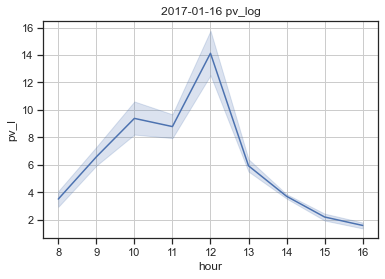

In [18]:
sns.lineplot(data=df_2018_01_16, x="hour", y="pv_l")
plt.title('2017-01-16 pv_log')
plt.grid()
plt.show()

<div class="alert alert-block alert-info">
    <b>Comment #4:</b>
    the plot of pv outputs versus time for the sample cloudy day of 2017-01-16, taken from 08:14 to 16:41 shows an shows an irregular pattern!
</div>

<div class="alert alert-block alert-success">
    <b>Comment #5:</b>
    As mentionned in the paper, trainval and test data sums to 102 885 sky images and the corresponding PV panel output.
</div>